
# Bar of pie

Demonstartionsbeispiel aus der matplotlib Galerie: Ein Tortendiagramm mit einem hervorgehobenem Teil kombiniert mit einem Balkendiagramm für zusätzliche Informationen für dieses Stück. Beispiel für eine subplot-Kombination mit vielen zusätzlichen kosmetischen Features.

## Einlesen der Bibliotheken


In [1]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import ConnectionPatch

## Tortengrafik und Balkendiagramm als Subplots anlegen 

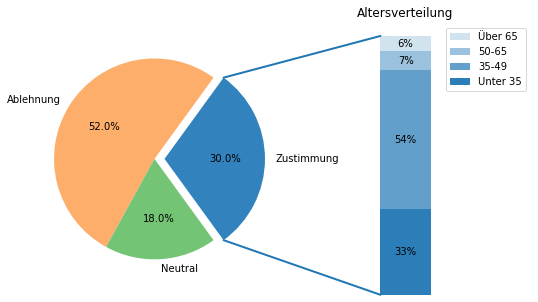

In [13]:
# subplot eine Zeile, zwei Zellen
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
fig.subplots_adjust(wspace=0)

# Tortengrafik Daten - Größe der Tortenstücke + Labels
overall_ratios = [.30, .52, .18]
labels = ['Zustimmung', 'Ablehnung', 'Neutral']

# erstes Stück herausheben
explode = [0.1, 0, 0]


# Drehen der Torte, so dass erstes Stück von x-Achse geteilt wird
cmap = plt.colormaps["tab20c"]
angle = -180 * overall_ratios[0]
wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=angle,
                     labels=labels, explode=explode, colors=cmap([0, 6, 9]))

# Balkendiagramm Daten
age_ratios = [.33, .54, .07, .06]
age_labels = ['Unter 35', '35-49', '50-65', 'Über 65']
bottom = 1
width = .2

# Legende + Labels, Achsen weglassen
for j, (height, label) in enumerate(reversed([*zip(age_ratios, age_labels)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color='C0', label=label,
                 alpha=0.2 + 0.25 * j)
    ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

ax2.set_title('Altersverteilung')
ax2.legend()
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)


# Verbindungslinien zwischen beiden Subplots - Tortenstück mit Balken optisch verbinden
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(age_ratios)

# Obere Linie
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color('tab:blue')
con.set_linewidth(2)
ax2.add_artist(con)

# Untere Linie
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color('tab:blue')
ax2.add_artist(con)
con.set_linewidth(2)

plt.show()

.. admonition:: References

   The use of the following functions, methods, classes and modules is shown
   in this example:

   - `matplotlib.axes.Axes.bar` / `matplotlib.pyplot.bar`
   - `matplotlib.axes.Axes.pie` / `matplotlib.pyplot.pie`
   - `matplotlib.patches.ConnectionPatch`

